# Chile 2010 Tsunami propagation example

The data used in this notebook came from [a GeoClaw gallery example](http://www.clawpack.org/_static/geoclaw/examples/tsunami/chile2010/_plots/_PlotIndex.html), but without using Adaptive Mesh refinement, to keep the data easy to load and work with.  For a tutorial on using GeoClaw that uses this example, see [this repository](https://github.com/clawpack/geoclaw_tutorial_csdms2016).

In [25]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma # masked arrays

The [data_tools.py](data_tools.py) file in this directory contains the same `read_asc_file` function that was used in the Crescent City notebook:

In [27]:
from data_tools import read_asc_file

### Read in topography data for this example:

In [28]:
topo_file = '../geoclaw_output/chile2010/topo.asc'
topo_data_dict = read_asc_file(topo_file)

ncols = 360
nrows = 360
xllcorner = -119.917
yllcorner = -59.9167
cellsize = 0.166667
nodata_value = -9999


In [29]:
X = topo_data_dict['X']
Y = topo_data_dict['Y']
topo = topo_data_dict['values']

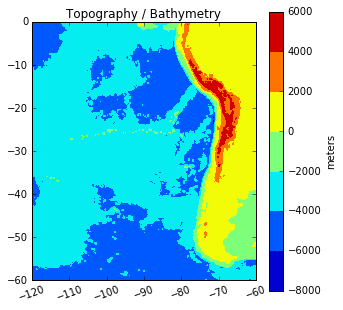

In [30]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

#plt.contour(X,Y,topo, np.linspace(-5000,0,6), colors='b', linestyles='-')
#plt.contour(X,Y,topo, np.linspace(0,5000,6), colors='g', linestyles='-')
plt.contourf(X,Y,topo)
cb = plt.colorbar()
cb.set_label('meters')
ax.set_aspect(1./np.cos(30*np.pi/180.))
ax.ticklabel_format(format='plain',useOffset=False)
plt.xticks(rotation=20);
plt.title('Topography / Bathymetry')

### Read in tsunami data at one particular time:

For the data in this example we use the surface elevation of a simulated tsunami, which has been calculated with the  [GeoClaw software](http://www.geoclaw.org) and stored in this repository as sample data.

Note that this data has already been converted from the [GeoClaw data format](http://www.clawpack.org/output_styles.html) normally used for output with nested adaptive grids to a simple `.asc` file for each time frame for simplicity in this tutorial.

We also know the times that corresponding to each time frame.  Normally this would also be read in from a file, but here we just set these times:

In [52]:
frame_times = np.linspace(0,5.5,12)
print "The data is at the following times (in hours after the earthquake):\n   ", frame_times

The data is at the following times (in hours after the earthquake):
    [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


First experiment with one time frame:

In [60]:
frameno = 9
filename = 'eta_%s.asc' % str(frameno).zfill(4)  # pads with zeros to fill 4 characters
eta_file = '../geoclaw_output/chile2010/%s' % filename
print 'Reading file %s\nTsunami simulation at time %4.1f hours after quake\n' % (eta_file, frame_times[frameno])
eta_data_dict = read_asc_file(eta_file)
Eta = eta_data_dict['values']

Reading file ../geoclaw_output/chile2010/eta_0009.asc
Tsunami simulation at time  4.5 hours after quake

ncols = 360
nrows = 360
xllcorner = -119.917
yllcorner = -59.9167
cellsize = 0.166667
nodata_value = -9999


Let's take a quick look at Eta:

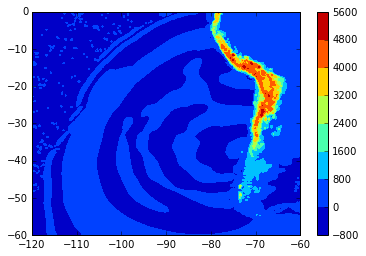

In [32]:
plt.contourf(X,Y,Eta)
plt.colorbar()

In this file, Eta represents the surface of the ocean / land, so our plot mostly shows the mountains of South America.

We only want to see the surface of the ocean, so let's mask out the land.  We'll also fix the aspect ratio and add a title...

In [33]:
Eta_offshore = ma.masked_where(topo>0, Eta)

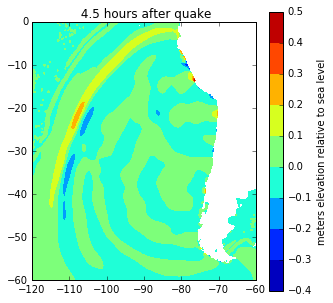

In [58]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.contourf(X,Y,Eta_offshore)
cb = plt.colorbar()
cb.set_label('meters elevation relative to sea level')

ax.set_aspect(1./np.cos(30*np.pi/180.))
ax.ticklabel_format(format='plain',useOffset=False)
ax.set_title('%4.1f hours after quake' % frame_times[frameno])

We can choose a colormap and breakpoints:

In [35]:
eta_colors = [[0,0,1], [.5,.5,1], [0,1,1], [1,.5,.5], [1,0,0]]
eta_levels = [-0.5,-0.1,-0.05,0.05,0.1,0.5]

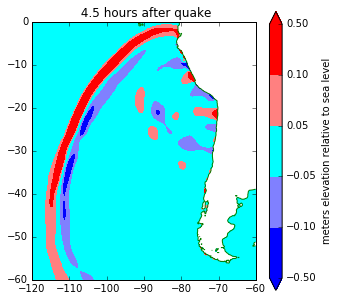

In [61]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

plt.contourf(X,Y,Eta_offshore, eta_levels, colors=eta_colors, extend='both')

cb = plt.colorbar()
cb.set_label('meters elevation relative to sea level')

# also plot the coastline in green:
# (do this *after* making the colorbar for the contourf plot)
plt.contour(X,Y,topo,[0], colors='g')

ax.set_aspect(1./np.cos(30*np.pi/180.))
ax.ticklabel_format(format='plain',useOffset=False)
ax.set_title('%4.1f hours after quake' % frame_times[frameno])

## Using basemap for projections

In [37]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm


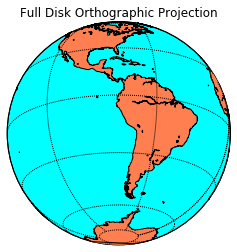

In [63]:
m = Basemap(projection='ortho',lon_0=-80,lat_0=-20,resolution='l')

m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))

plt.title("Full Disk Orthographic Projection")
plt.show()

In [64]:
Xortho, Yortho = m(X,Y)

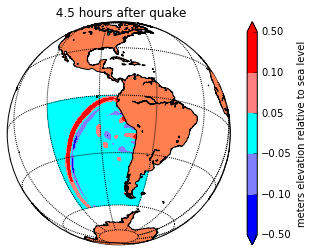

In [66]:
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')

plt.contourf(Xortho,Yortho,Eta_offshore, eta_levels, \
             colors=eta_colors, extend='both');
cb = plt.colorbar()
cb.set_label('meters elevation relative to sea level')
plt.title('%4.1f hours after quake' % frame_times[frameno])

## Animations

We can display the tsunami at a several times as separate figures but embedding the code above in a loop, e.g.

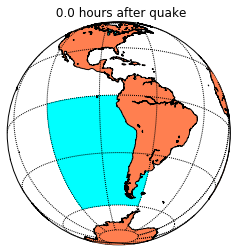

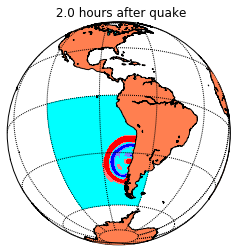

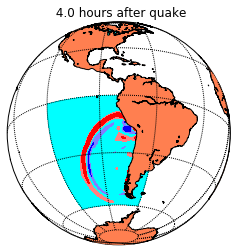

In [67]:
for frameno in [0,4,8]:
    eta_file = '../geoclaw_output/chile2010/eta_%s.asc' \
                % str(frameno).zfill(4)
    eta_data_dict = read_asc_file(eta_file, verbose=False)
    Eta = eta_data_dict['values']
    Eta_offshore = ma.masked_where(topo>0, Eta)
    
    plt.figure()
    m.drawparallels(np.arange(-90.,120.,30.))
    m.drawmeridians(np.arange(0.,420.,30.))
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    plt.contourf(Xortho,Yortho,Eta_offshore, eta_levels, \
                 colors=eta_colors, extend='both')
    plt.title('%4.1f hours after quake' % frame_times[frameno])

Instead we might want to create animation.  There are various ways to do this. The module [animation_tools.py](animation_tools.py) in this directory provides some tools to create animations using either the Jupyter widgets (providing a slider bar to change frame) or using the package [JSAnimation](https://github.com/jakevdp/JSAnimation), which produces javascript to loop over the frames with controls.  Both of these are briefly illustrated here.  For more information see the notebook [animation_tools_demo.ipynb](animation_tools_demo.ipynb).

*Note:* The tools in this module can probably be improved!

In [42]:
import animation_tools

In [68]:
figs = []  # to collect set of figures we will animate

m = Basemap(projection='ortho',lon_0=-80,lat_0=-20,resolution='l')
Xortho, Yortho = m(X,Y)

for frameno in range(12):
    eta_file = '../geoclaw_output/chile2010/eta_%s.asc' \
                % str(frameno).zfill(4)
    eta_data_dict = read_asc_file(eta_file, verbose=False)
    Eta = eta_data_dict['values']
    Eta_offshore = ma.masked_where(topo>0, Eta)
    
    fig = plt.figure()
    m.drawparallels(np.arange(-90.,120.,30.))
    m.drawmeridians(np.arange(0.,420.,30.))
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    plt.contourf(Xortho,Yortho,Eta_offshore, eta_levels, \
                 colors=eta_colors, extend='both')
    plt.title('%4.1f hours after quake' % frame_times[frameno])
    figs.append(fig)
    plt.close(fig)
    

## Animate using ipywidgets:

Note that this animation only works if you are running the notebook, not when viewed on Github or via nbviewer.

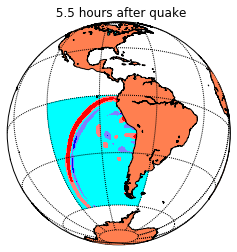

In [69]:
animation_tools.interact_animate_figs(figs)

## Animate using JSAnimation:

This version can be viewed on Github or via nbviewer, if the notebook is saved with the cell output intact.

In [70]:
images = animation_tools.make_images(figs, dpi=150)


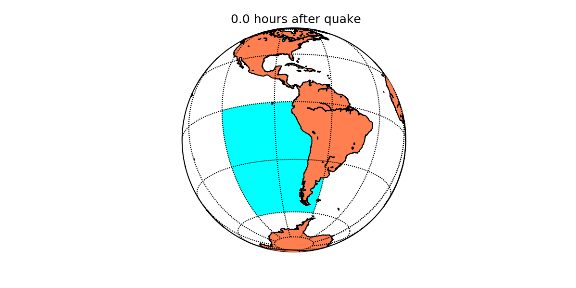
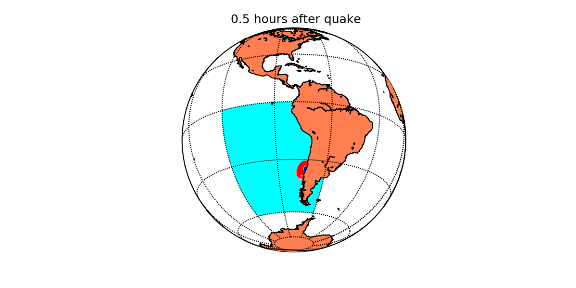
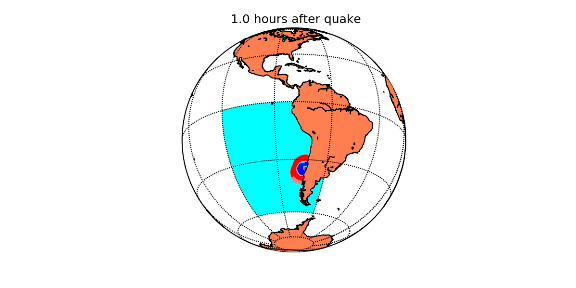
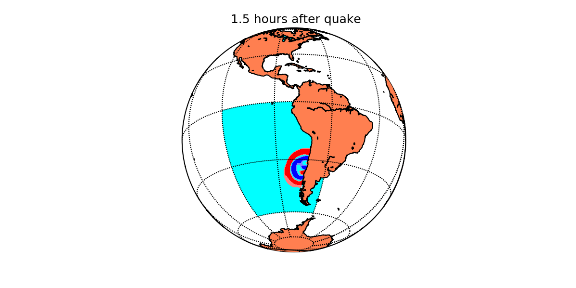
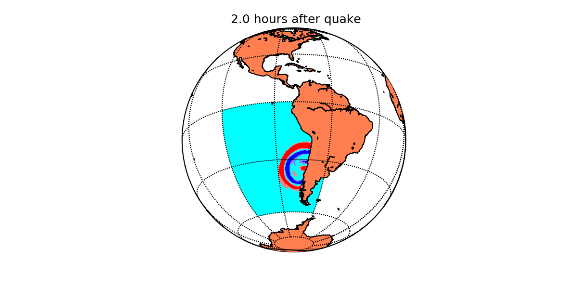
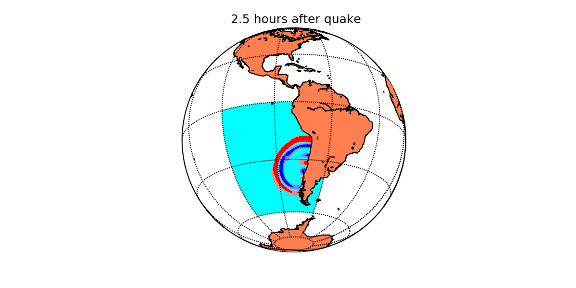
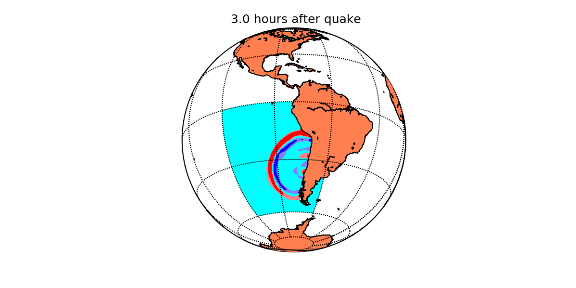
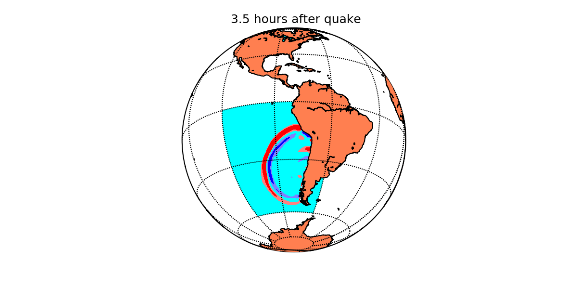
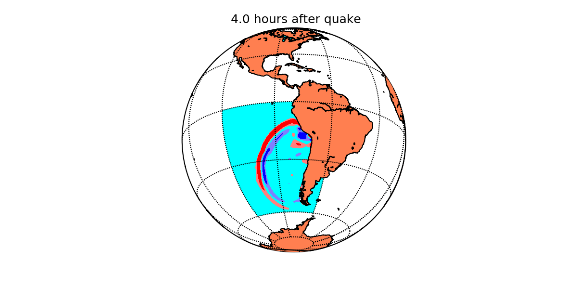
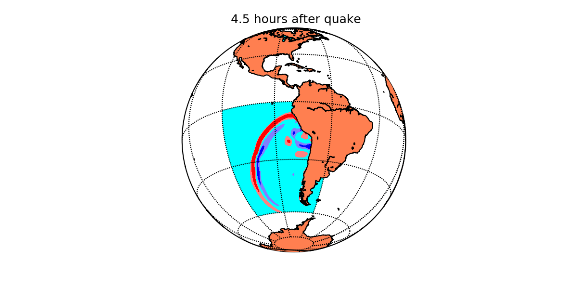
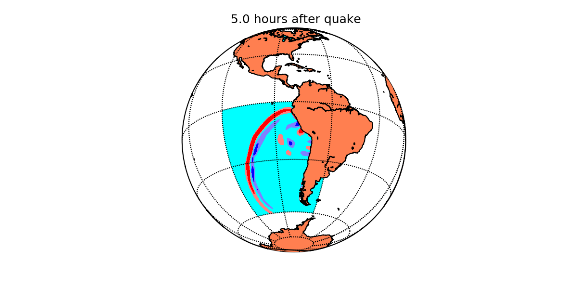
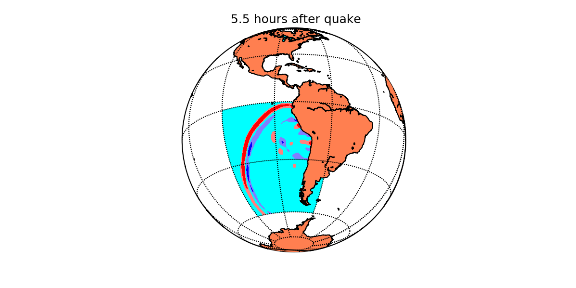

In [71]:
animation_tools.JSAnimate_images(images, figsize=(8,4))

## Create a stand-alone html file:

In [72]:
anim = animation_tools.JSAnimate_images(images, figsize=(10,8))

file_name = 'chile2010_on_sphere.html'
animation_tools.make_html(anim, file_name=file_name, title="Chile 2010 Tsunami", 
                          raw_html="Illustration of html file created by <tt>make_html</tt>")

Created chile2010_on_sphere.html


This creates a separate file [chile2010_on_sphere.html](chile2010_on_sphere.html) that can be moved elsewhere, e.g. to display on a website or to send to a collaborator.  The figures for each frame are embedded in this html file.

## Other projections might be better, e.g. to show global propagation:

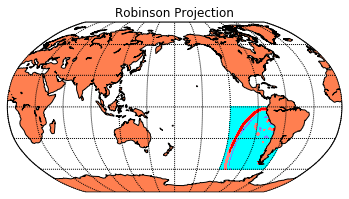

In [48]:
m = Basemap(projection='robin',lon_0=-180,resolution='c')
Xortho, Yortho = m(X,Y)

m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawcoastlines()
m.fillcontinents(color='coral')
plt.contourf(Xortho,Yortho,Eta_offshore, eta_levels, colors=eta_colors)
plt.title("Robinson Projection")

## To do:

- Add more discussion
- better colormaps